In [1]:
#import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bookings_df=pd.read_csv('bookings_senior.csv')
bookings_df


,booking_id,customer_id,room_id,check_in,check_out,status,created_at
0,1,198,165,2023-12-26,2024-01-02,Cancelled,2023-12-26
1,2,466,32,2023-09-02,2023-09-12,Pending,2023-09-02
2,3,131,15,2024-06-03,2024-06-07,Pending,2024-06-03
3,4,138,17,2023-05-26,2023-05-30,Cancelled,2023-05-26
4,5,50,178,2024-04-19,2024-04-28,Confirmed,2024-04-19
...,...,...,...,...,...,...,...
4995,4996,219,155,2024-12-15,2024-12-21,Confirmed,2024-12-15
4996,4997,333,67,2023-04-01,2023-04-15,Cancelled,2023-04-01
4997,4998,330,68,2024-06-29,2024-07-06,Pending,2024-06-29
4998,4999,109,86,2023-05-22,2023-06-04,Pending,2023-05-22


In [3]:
customers_df=pd.read_csv('customers_senior.csv')
payments_df=pd.read_csv('payments_senior.csv')
rooms_df=pd.read_csv('rooms_senior.csv')
services_df=pd.read_csv('services_senior.csv')
services_usage_df=pd.read_csv('service_usage_senior.csv')

In [4]:
bookings_df.head()

,booking_id,customer_id,room_id,check_in,check_out,status,created_at
0,1,198,165,2023-12-26,2024-01-02,Cancelled,2023-12-26
1,2,466,32,2023-09-02,2023-09-12,Pending,2023-09-02
2,3,131,15,2024-06-03,2024-06-07,Pending,2024-06-03
3,4,138,17,2023-05-26,2023-05-30,Cancelled,2023-05-26
4,5,50,178,2024-04-19,2024-04-28,Confirmed,2024-04-19


In [5]:
rooms_df.head()



,room_id,room_number,room_type,price_per_night,status
0,1,R101,Standard,78,Available
1,2,R102,Suite,55,Booked
2,3,R103,Deluxe,461,Available
3,4,R104,Deluxe,184,Booked
4,5,R105,Suite,88,Available


In [6]:
customers_df.head()

,customer_id,full_name,email,phone,created_at
0,1,Customer 1,customer1@mail.com,84987769332,2023-08-08 03:27:22.206023
1,2,Customer 2,customer2@mail.com,84995781527,2023-11-11 03:27:22.206033
2,3,Customer 3,customer3@mail.com,84969411145,2023-10-07 03:27:22.206035
3,4,Customer 4,customer4@mail.com,84917802932,2023-08-05 03:27:22.206037
4,5,Customer 5,customer5@mail.com,84992266036,2024-06-02 03:27:22.206039


In [7]:
payments_df.head()

,payment_id,booking_id,amount,payment_method,payment_date
0,1,1172,1858,Credit Card,2023-12-20
1,2,2311,1275,PayPal,2024-05-23
2,3,651,216,Bank Transfer,2023-11-28
3,4,3016,1407,Crypto,2024-12-28
4,5,3516,1961,PayPal,2023-03-11


## **Hướng Phân Tích Kinh Doanh (Business Analysis)**

### **1. Hiệu suất đặt phòng:**

#### **Phòng nào có tỷ lệ lấp đầy thấp nhất?**

In [8]:
import pandas as pd

# Đảm bảo chuyển đổi cột ngày tháng về kiểu datetime
bookings_df["check_in"] = pd.to_datetime(bookings_df["check_in"], errors="coerce")
bookings_df["check_out"] = pd.to_datetime(bookings_df["check_out"], errors="coerce")

# Tính số đêm lưu trú cho mỗi đặt phòng
bookings_df["nights_stayed"] = (bookings_df["check_out"] - bookings_df["check_in"]).dt.days

# Tính tổng số ngày mỗi phòng đã được đặt
room_occupancy = bookings_df.groupby("room_id")["nights_stayed"].sum().reset_index()

# Tính tổng số ngày hoạt động của khách sạn
total_days = (bookings_df["check_out"].max() - bookings_df["check_in"].min()).days

# Kết hợp với dữ liệu phòng
room_occupancy = room_occupancy.merge(rooms_df, on="room_id", how="left")

# Tính tỷ lệ lấp đầy
room_occupancy["occupancy_rate"] = (room_occupancy["nights_stayed"] / total_days) * 100

# Tìm phòng có tỷ lệ lấp đầy thấp nhất
lowest_occupancy = room_occupancy.nsmallest(10, "occupancy_rate")

# Hiển thị kết quả
print(lowest_occupancy[["room_id", "room_type", "occupancy_rate"]])


     room_id     room_type  occupancy_rate
165      166     Executive        9.421265
173      174        Deluxe       10.632571
94        95      Standard       11.440108
81        82         Suite       11.709287
88        89     Executive       13.055182
67        68         Suite       13.593540
5          6  Presidential       13.728129
189      190         Suite       13.728129
17        18     Executive       13.862719
104      105     Executive       13.862719


#### **Khách hàng thường đặt phòng theo mùa hay có xu hướng cụ thể?**

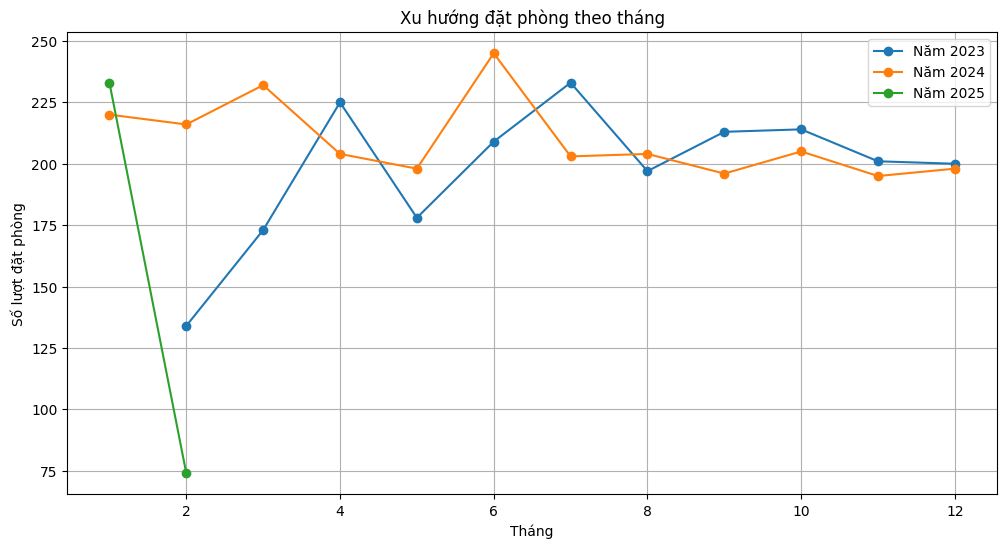

In [9]:
import matplotlib.pyplot as plt

# Thêm cột tháng và năm
bookings_df["month"] = bookings_df["check_in"].dt.month
bookings_df["year"] = bookings_df["check_in"].dt.year

# Đếm số lượt đặt phòng theo tháng
monthly_bookings = bookings_df.groupby(["year", "month"]).size().reset_index(name="booking_count")

# Vẽ biểu đồ xu hướng đặt phòng theo thời gian
plt.figure(figsize=(12, 6))
for year in monthly_bookings["year"].unique():
    subset = monthly_bookings[monthly_bookings["year"] == year]
    plt.plot(subset["month"], subset["booking_count"], marker="o", label=f"Năm {year}")

plt.xlabel("Tháng")
plt.ylabel("Số lượt đặt phòng")
plt.title("Xu hướng đặt phòng theo tháng")
plt.legend()
plt.grid(True)
plt.show()


### Analysis:
+ có một số tháng có xu hướng tăng số lượng đặt phòng rõ rệt điển hình trong số đó là từ tháng 5-7. Điều này có thể liên qua đến người dân có xu hướng đi du lịch vào dịp hè
+ tháng 1 và 2 có xu hướng giảm mạnh có thể là do đó khoảng thời gian sau kì nghỉ lễ tết hoặc mùa thấp điểm
+ 2 năm 2024 và 2023 hầu như là có sự đồng nhất về số lượng, riêng năm 2025 có ít dữ liệu hơn nhưng có dấu hiệu giảm mạnh vào tháng 2  

### **2.Doanh thu & Dịch vụ:**

#### **Những dịch vụ nào được sử dụng nhiều nhất?**

In [10]:
# Tổng số lần sử dụng từng dịch vụ
service_usage_summary = services_usage_df.groupby("service_id")["quantity"].sum().reset_index()

# Kết hợp với thông tin dịch vụ
service_usage_summary = service_usage_summary.merge(services_df, on="service_id", how="left")

# Sắp xếp theo số lượng sử dụng nhiều nhất
service_usage_summary = service_usage_summary.sort_values(by="quantity", ascending=False)

print(service_usage_summary.head(10))  # Xem top 10 dịch vụ phổ biến


   service_id  quantity    service_name  price
5           6      2458    Room Service     27
7           8      2422    Tour Package     96
8           9      2415      VIP Lounge    106
2           3      2405             Spa    130
4           5      2325  Airport Pickup    124
1           2      2278         Laundry     82
6           7      2263        Mini Bar     86
3           4      2241             Gym     23
0           1      2173       Breakfast    112


#### **Khách sạn có phụ thuộc quá nhiều vào một nhóm khách hàng cụ thể không?**

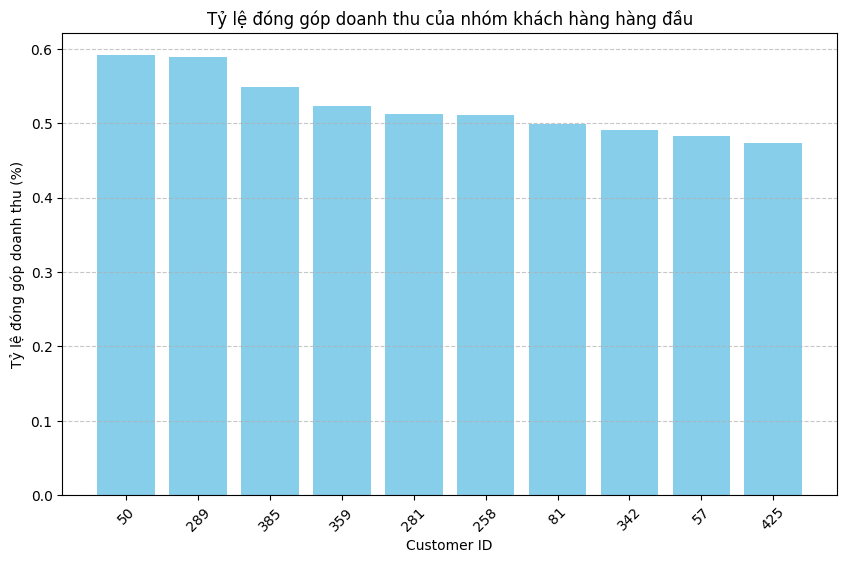

Tổng tỷ lệ doanh thu của 10 khách hàng hàng đầu: 5.22%


In [11]:


# Tính tổng doanh thu của mỗi khách hàng từ các khoản thanh toán
revenue_per_customer = payments_df.groupby("booking_id")["amount"].sum().reset_index()

# Kết hợp với thông tin khách hàng từ bảng bookings
revenue_per_customer = revenue_per_customer.merge(bookings_df[["booking_id", "customer_id"]], on="booking_id", how="left")

# Tổng doanh thu theo từng khách hàng
revenue_per_customer = revenue_per_customer.groupby("customer_id")["amount"].sum().reset_index()

# Tính tỷ lệ doanh thu mà mỗi khách hàng đóng góp
total_revenue = revenue_per_customer["amount"].sum()
revenue_per_customer["revenue_share"] = (revenue_per_customer["amount"] / total_revenue) * 100

# Xác định nhóm khách hàng chi tiêu nhiều nhất (Top 10 khách hàng)
top_customers = revenue_per_customer.sort_values(by="amount", ascending=False).head(10)

# Tính tổng tỷ lệ doanh thu của nhóm khách hàng hàng đầu
top_customers_revenue_share = top_customers["revenue_share"].sum()

# Vẽ biểu đồ thể hiện đóng góp doanh thu của nhóm khách hàng hàng đầu
plt.figure(figsize=(10, 6))
plt.bar(top_customers["customer_id"].astype(str), top_customers["revenue_share"], color='skyblue')
plt.xlabel("Customer ID")
plt.ylabel("Tỷ lệ đóng góp doanh thu (%)")
plt.title("Tỷ lệ đóng góp doanh thu của nhóm khách hàng hàng đầu")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Hiển thị tổng tỷ lệ đóng góp của nhóm khách hàng hàng đầu
print(f"Tổng tỷ lệ doanh thu của 10 khách hàng hàng đầu: {top_customers_revenue_share:.2f}%")


+ Doanh thu khách hàng được phân bổ khá đồng đều không quá tập trung vào khách hàng cụ thể nào cả
+ Nhóm 10 khách hàng hàng đầu chiếm 5.22% điều này cho thấy khách sạn k quá tập trung vào một nhóm khách hàng cụ thể mà đa dạng hóa lượng khách hàng

### **3.Tối ưu hóa giá phòng:**

#### **Giá phòng hiện tại có ảnh hưởng đến lượng đặt phòng không?**

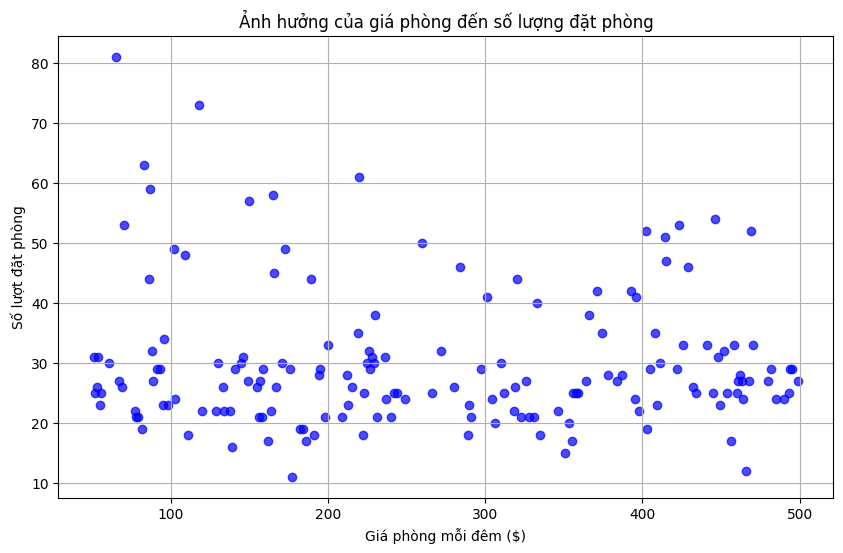

In [12]:

# Kết hợp dữ liệu đặt phòng với thông tin phòng
bookings_with_price = bookings_df.merge(rooms_df, on="room_id", how="left")

# Đếm số lượt đặt phòng theo giá phòng
price_booking_counts = bookings_with_price.groupby("price_per_night")["booking_id"].count().reset_index()
price_booking_counts = price_booking_counts.rename(columns={"booking_id": "booking_count"})

# Vẽ biểu đồ mối quan hệ giữa giá phòng và số lượt đặt phòng
plt.figure(figsize=(10, 6))
plt.scatter(price_booking_counts["price_per_night"], price_booking_counts["booking_count"], alpha=0.7, color="blue")
plt.xlabel("Giá phòng mỗi đêm ($)")
plt.ylabel("Số lượt đặt phòng")
plt.title("Ảnh hưởng của giá phòng đến số lượng đặt phòng")
plt.grid(True)
plt.show()


Giá phòng dường như không có tác động mạnh đến số lượng đặt phòng

#### **Nên điều chỉnh giá theo mùa hay không?**

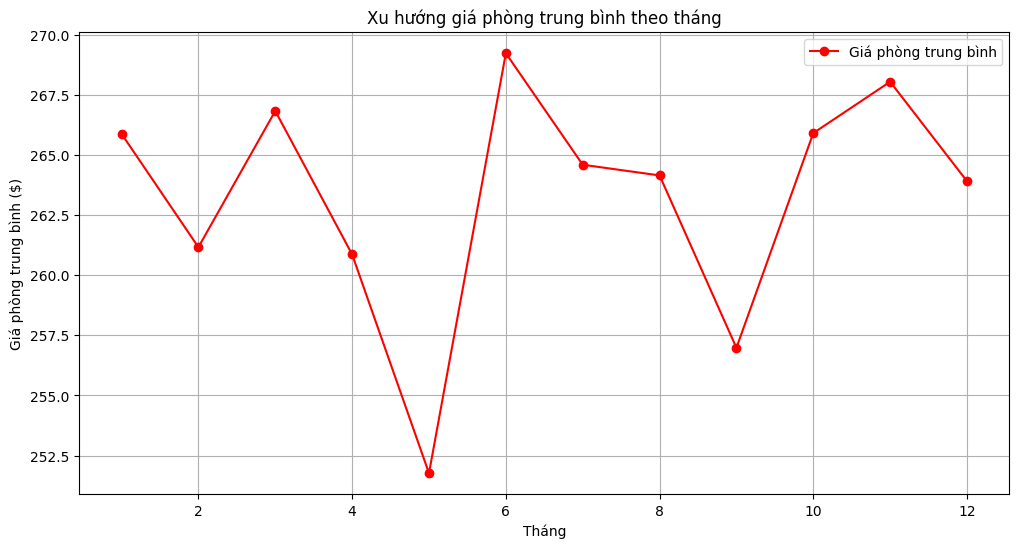

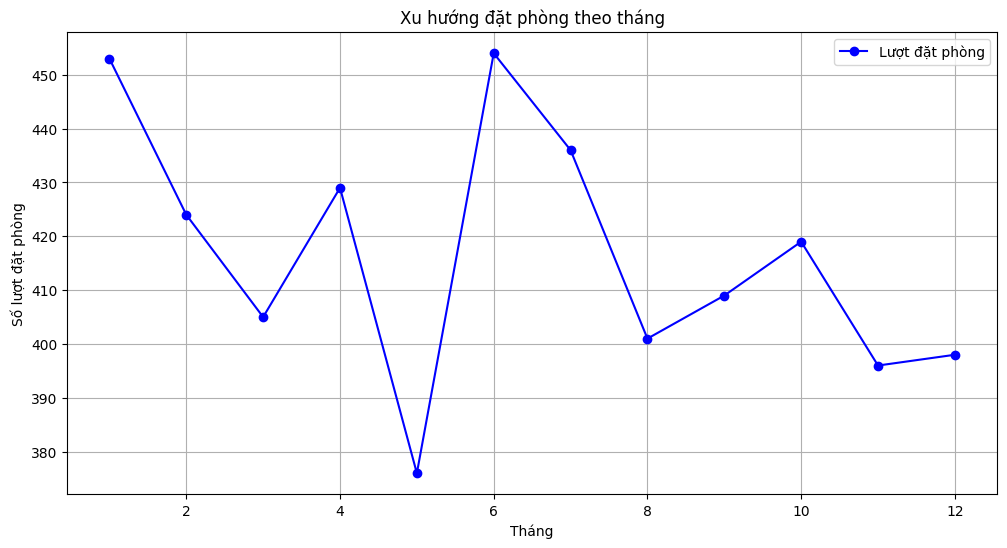

In [13]:
# Chuyển đổi cột ngày thành dạng datetime
bookings_df["check_in"] = pd.to_datetime(bookings_df["check_in"])

# Thêm cột tháng vào dữ liệu
bookings_df["month"] = bookings_df["check_in"].dt.month

# Kết hợp với thông tin giá phòng
seasonal_price_analysis = bookings_df.merge(rooms_df, on="room_id", how="left")

# Tính giá trung bình mỗi tháng
monthly_price = seasonal_price_analysis.groupby("month")["price_per_night"].mean().reset_index()

# Đếm số lượt đặt phòng theo tháng
monthly_bookings = bookings_df.groupby("month")["booking_id"].count().reset_index()
monthly_bookings = monthly_bookings.rename(columns={"booking_id": "booking_count"})

# Vẽ biểu đồ giá phòng trung bình theo tháng
plt.figure(figsize=(12, 6))
plt.plot(monthly_price["month"], monthly_price["price_per_night"], marker="o", linestyle="-", color="red", label="Giá phòng trung bình")
plt.xlabel("Tháng")
plt.ylabel("Giá phòng trung bình ($)")
plt.title("Xu hướng giá phòng trung bình theo tháng")
plt.grid(True)
plt.legend()
plt.show()

# Vẽ biểu đồ số lượt đặt phòng theo tháng
plt.figure(figsize=(12, 6))
plt.plot(monthly_bookings["month"], monthly_bookings["booking_count"], marker="o", linestyle="-", color="blue", label="Lượt đặt phòng")
plt.xlabel("Tháng")
plt.ylabel("Số lượt đặt phòng")
plt.title("Xu hướng đặt phòng theo tháng")
plt.grid(True)
plt.legend()
plt.show()


+ Giá phòng trung bình giảm mạnh vào tháng 5 và tháng 9 sau đó tăng trở lại vào tháng 6 và tháng 10
+ Khách sạn có thể điều chỉnh giá theo mùa nhưng nên cân nhắc xem có tối ưu hay k bằng cách cân nhắc các nhu cầu thực tế

### **4.Tỷ lệ hủy phòng:**

#### **Bao nhiêu % đặt phòng bị hủy?**

In [14]:

# Tính tổng số lượt đặt phòng và số lượt hủy phòng
total_bookings = bookings_df.shape[0]
cancelled_bookings = bookings_df[bookings_df["status"] == "Cancelled"].shape[0]

# Tính tỷ lệ hủy phòng
cancellation_rate = (cancelled_bookings / total_bookings) * 100
print(f"Tỷ lệ hủy phòng: {cancellation_rate:.2f}%")


Tỷ lệ hủy phòng: 34.04%


#### **Có lý do nào phổ biến dẫn đến việc hủy phòng không?**

Index(['booking_id', 'customer_id', 'room_id', 'check_in', 'check_out',
       'status_x', 'created_at', 'nights_stayed', 'month', 'year',
       'room_number', 'room_type', 'price_per_night', 'status_y'],
      dtype='object')


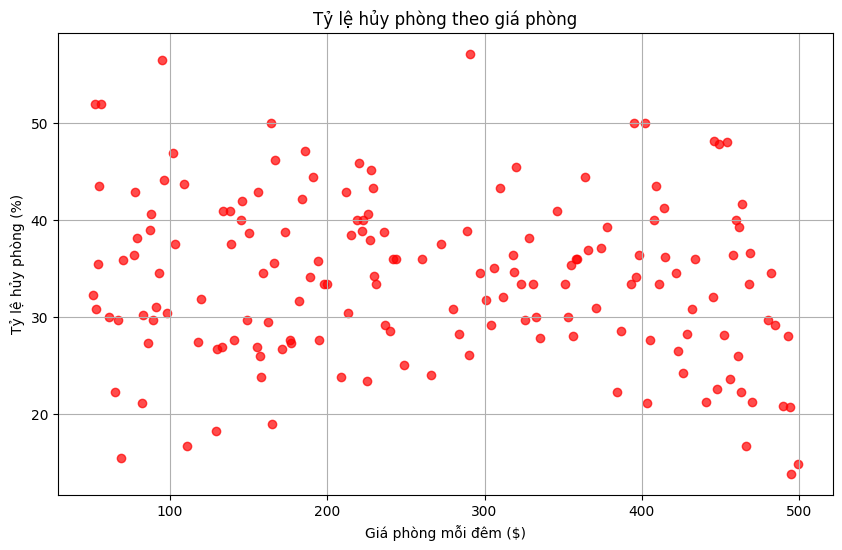

In [15]:
# Kiểm tra lại tên cột
print(bookings_with_price.columns)

# Tính tỷ lệ hủy của từng mức giá phòng với status_x
price_cancellation = bookings_with_price.groupby("price_per_night")["status_x"].apply(lambda x: (x == "Cancelled").mean()).reset_index()
price_cancellation["cancellation_rate"] = price_cancellation["status_x"] * 100

# Vẽ biểu đồ tỷ lệ hủy theo giá phòng
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(price_cancellation["price_per_night"], price_cancellation["cancellation_rate"], color="red", alpha=0.7)
plt.xlabel("Giá phòng mỗi đêm ($)")
plt.ylabel("Tỷ lệ hủy phòng (%)")
plt.title("Tỷ lệ hủy phòng theo giá phòng")
plt.grid(True)
plt.show()


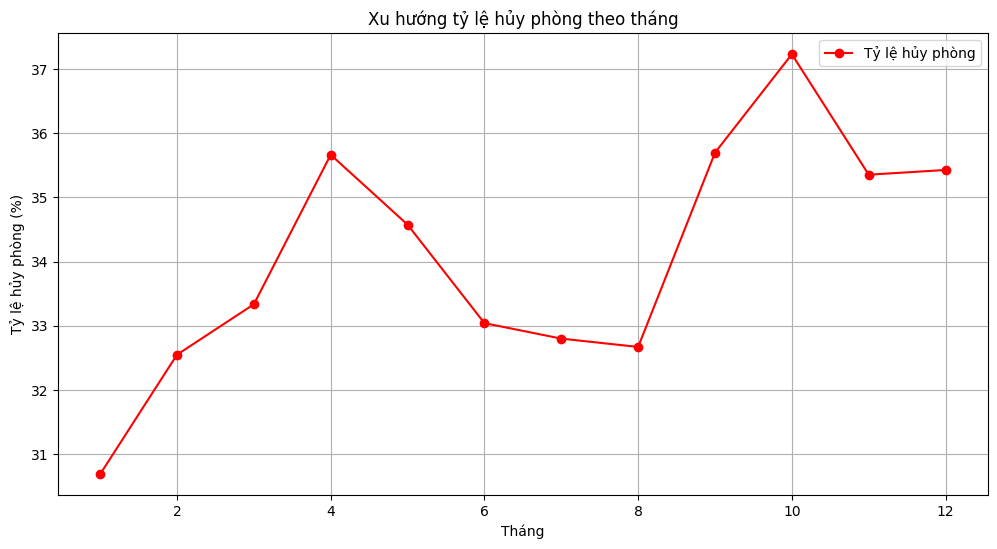

In [16]:
# Chuyển đổi cột ngày thành dạng datetime
bookings_df["check_in"] = pd.to_datetime(bookings_df["check_in"])

# Thêm cột tháng vào dữ liệu
bookings_df["month"] = bookings_df["check_in"].dt.month

# Tính tỷ lệ hủy theo tháng
monthly_cancellation = bookings_df.groupby("month")["status"].apply(lambda x: (x == "Cancelled").mean()).reset_index()
monthly_cancellation["cancellation_rate"] = monthly_cancellation["status"] * 100

# Vẽ biểu đồ tỷ lệ hủy theo tháng
plt.figure(figsize=(12, 6))
plt.plot(monthly_cancellation["month"], monthly_cancellation["cancellation_rate"], marker="o", linestyle="-", color="red", label="Tỷ lệ hủy phòng")
plt.xlabel("Tháng")
plt.ylabel("Tỷ lệ hủy phòng (%)")
plt.title("Xu hướng tỷ lệ hủy phòng theo tháng")
plt.grid(True)
plt.legend()
plt.show()


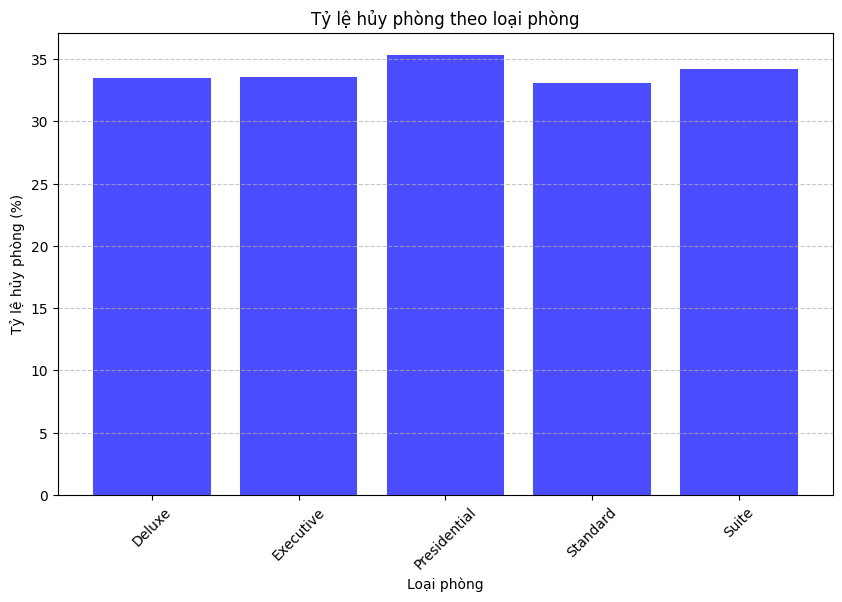

In [17]:
# Kết hợp với thông tin phòng
cancellation_by_room_type = bookings_with_price.groupby("room_type")["status_x"].apply(lambda x: (x == "Cancelled").mean()).reset_index()
cancellation_by_room_type["cancellation_rate"] = cancellation_by_room_type["status_x"] * 100

# Vẽ biểu đồ tỷ lệ hủy theo loại phòng
plt.figure(figsize=(10, 6))
plt.bar(cancellation_by_room_type["room_type"], cancellation_by_room_type["cancellation_rate"], color="blue", alpha=0.7)
plt.xlabel("Loại phòng")
plt.ylabel("Tỷ lệ hủy phòng (%)")
plt.title("Tỷ lệ hủy phòng theo loại phòng")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


+  Không có mối quan hệ rõ ràng giữa giá phòng và tỷ lệ hủy.
+  Tỷ lệ hủy cao vào tháng 4 và tháng 10, có thể do thay đổi về mùa hoặc sự kiện.
+ Phòng cao cấp có tỷ lệ hủy cao hơn, có thể do giá cao và thay đổi kế hoạch.



## **2.Hướng Tối Ưu Giá Phòng (Dynamic Pricing Optimization)**

#### **Machine Learning (Regression Models) để dự đoán giá tối ưu**

In [18]:

# Kết hợp dữ liệu đặt phòng với thông tin phòng
data = bookings_df.merge(rooms_df, on="room_id", how="left")
data.head()


,booking_id,customer_id,room_id,check_in,check_out,status_x,created_at,nights_stayed,month,year,room_number,room_type,price_per_night,status_y
0,1,198,165,2023-12-26,2024-01-02,Cancelled,2023-12-26,7,12,2023,R265,Presidential,335,Available
1,2,466,32,2023-09-02,2023-09-12,Pending,2023-09-02,10,9,2023,R132,Presidential,173,Available
2,3,131,15,2024-06-03,2024-06-07,Pending,2024-06-03,4,6,2024,R115,Executive,86,Available
3,4,138,17,2023-05-26,2023-05-30,Cancelled,2023-05-26,4,5,2023,R117,Executive,323,Available
4,5,50,178,2024-04-19,2024-04-28,Confirmed,2024-04-19,9,4,2024,R278,Presidential,138,Available


In [19]:
# drop columns year,room_number,status_y  (data)
# Danh sách các cột cần loại bỏ
columns_to_drop = ["created_at", "year", "room_number", "status_y"]

# Loại bỏ cột
data_cleaned = data.drop(columns=columns_to_drop, errors="ignore")

# Kiểm tra kết quả
data_cleaned.head()


,booking_id,customer_id,room_id,check_in,check_out,status_x,nights_stayed,month,room_type,price_per_night
0,1,198,165,2023-12-26,2024-01-02,Cancelled,7,12,Presidential,335
1,2,466,32,2023-09-02,2023-09-12,Pending,10,9,Presidential,173
2,3,131,15,2024-06-03,2024-06-07,Pending,4,6,Executive,86
3,4,138,17,2023-05-26,2023-05-30,Cancelled,4,5,Executive,323
4,5,50,178,2024-04-19,2024-04-28,Confirmed,9,4,Presidential,138


In [20]:
data_cleaned.head()

,booking_id,customer_id,room_id,check_in,check_out,status_x,nights_stayed,month,room_type,price_per_night
0,1,198,165,2023-12-26,2024-01-02,Cancelled,7,12,Presidential,335
1,2,466,32,2023-09-02,2023-09-12,Pending,10,9,Presidential,173
2,3,131,15,2024-06-03,2024-06-07,Pending,4,6,Executive,86
3,4,138,17,2023-05-26,2023-05-30,Cancelled,4,5,Executive,323
4,5,50,178,2024-04-19,2024-04-28,Confirmed,9,4,Presidential,138


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [22]:
data_cleaned.head()


,booking_id,customer_id,room_id,check_in,check_out,status_x,nights_stayed,month,room_type,price_per_night
0,1,198,165,2023-12-26,2024-01-02,Cancelled,7,12,Presidential,335
1,2,466,32,2023-09-02,2023-09-12,Pending,10,9,Presidential,173
2,3,131,15,2024-06-03,2024-06-07,Pending,4,6,Executive,86
3,4,138,17,2023-05-26,2023-05-30,Cancelled,4,5,Executive,323
4,5,50,178,2024-04-19,2024-04-28,Confirmed,9,4,Presidential,138


In [23]:
from sklearn.preprocessing import LabelEncoder

# Mã hóa loại phòng thành số
le = LabelEncoder()
data_cleaned["room_type"] = le.fit_transform(data_cleaned["room_type"])
data_cleaned["status_x"] = le.fit_transform(data_cleaned["status_x"])




In [24]:
X=data_cleaned.drop(columns=['price_per_night'])
y=data_cleaned['price_per_night']

In [25]:
X

,booking_id,customer_id,room_id,check_in,check_out,status_x,nights_stayed,month,room_type
0,1,198,165,2023-12-26,2024-01-02,0,7,12,2
1,2,466,32,2023-09-02,2023-09-12,2,10,9,2
2,3,131,15,2024-06-03,2024-06-07,2,4,6,1
3,4,138,17,2023-05-26,2023-05-30,0,4,5,1
4,5,50,178,2024-04-19,2024-04-28,1,9,4,2
...,...,...,...,...,...,...,...,...,...
4995,4996,219,155,2024-12-15,2024-12-21,1,6,12,4
4996,4997,333,67,2023-04-01,2023-04-15,0,14,4,0
4997,4998,330,68,2024-06-29,2024-07-06,2,7,6,4
4998,4999,109,86,2023-05-22,2023-06-04,2,13,5,2


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Xóa cột ngày tháng khỏi X_train và X_test
X_train = X_train.drop(columns=["check_in", "check_out"], errors="ignore")
X_test = X_test.drop(columns=["check_in", "check_out"], errors="ignore")


In [28]:
X_train

,booking_id,customer_id,room_id,status_x,nights_stayed,month,room_type
4227,4228,53,76,0,8,8,4
4676,4677,287,65,0,14,2,4
800,801,424,43,1,1,11,2
3671,3672,11,145,2,6,2,0
4193,4194,246,11,0,2,9,2
...,...,...,...,...,...,...,...
4426,4427,81,34,0,5,11,2
466,467,49,174,0,5,10,0
3092,3093,424,44,2,2,4,4
3772,3773,185,153,1,9,2,1


In [29]:
from xgboost import XGBRegressor

# Huấn luyện mô hình XGBoost
model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá lại mô hình
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"New MAE: {mae:.2f}")
print(f"New R² Score: {r2:.2f}")


New MAE: 12.94
New R² Score: 0.99


In [30]:
import pandas as pd

# Tạo tập dữ liệu giả lập để dự đoán giá tối ưu
test_data = pd.DataFrame({
    "nights_stayed": [1, 2, 3, 4, 5],  # Số đêm lưu trú
    "month": [1, 3, 6, 8, 10],  # Tháng trong năm
    "room_type": ["Deluxe", "Executive", "Presidential", "Standard", "Suite"],  # Loại phòng
    "status_x": ["Confirmed", "Pending", "Cancelled", "Confirmed", "Pending"]  # Trạng thái đặt phòng
})

# Áp dụng One-Hot Encoding để phù hợp với mô hình XGBoost
test_data_encoded = pd.get_dummies(test_data, columns=["room_type", "status_x"], drop_first=True)

# Đảm bảo test_data_encoded có cùng cột với X_train
missing_cols = set(X_train.columns) - set(test_data_encoded.columns)
for col in missing_cols:
    test_data_encoded[col] = 0  # Thêm các cột thiếu và đặt giá trị mặc định là 0

# Sắp xếp lại cột để khớp với X_train
test_data_encoded = test_data_encoded[X_train.columns]


In [31]:
# Dự đoán giá phòng tối ưu
predicted_prices = model.predict(test_data_encoded)

# Hiển thị kết quả
test_data["optimal_price"] = predicted_prices
print(test_data[["nights_stayed", "month", "room_type", "status_x", "optimal_price"]])


   nights_stayed  month     room_type   status_x  optimal_price
0              1      1        Deluxe  Confirmed     205.685440
1              2      3     Executive    Pending     213.933136
2              3      6  Presidential  Cancelled     213.933136
3              4      8      Standard  Confirmed     213.933136
4              5     10         Suite    Pending     213.732559


##  **3.Hướng Dự Đoán & Phân Loại Khách Hàng (Customer Segmentation & Churn Prediction)**

### **Ai là khách hàng VIP?**

In [32]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


revenue_per_customer = payments_df.groupby("booking_id")["amount"].sum().reset_index()
revenue_per_customer = revenue_per_customer.merge(bookings_df[["booking_id", "customer_id", "nights_stayed"]], on="booking_id", how="left")

# Tính tổng doanh thu và số đêm lưu trú cho mỗi khách hàng
revenue_per_customer = revenue_per_customer.groupby("customer_id")[["amount", "nights_stayed"]].sum().reset_index()

# Chọn các đặc trưng để phân nhóm khách hàng (doanh thu và số đêm lưu trú)
X = revenue_per_customer[["amount", "nights_stayed"]]  # Bao gồm tổng doanh thu và số đêm lưu trú



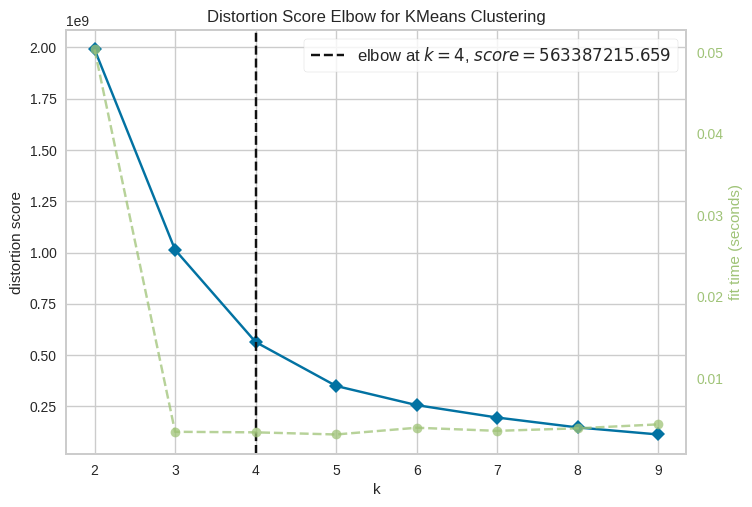

In [33]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

#### Build model with k = 4

In [34]:
KM_4_clusters = KMeans(n_clusters=4, init='k-means++').fit(X)

KM4_clustered = X.copy()
KM4_clustered.loc[:,'Cluster'] = KM_4_clusters.labels_

In [35]:
KM_4_clusters.cluster_centers_

array([[ 5621.29714286,    33.58285714],
       [13726.88888889,    61.66666667],
       [ 2529.92156863,    19.03921569],
       [ 8845.67938931,    45.73282443]])

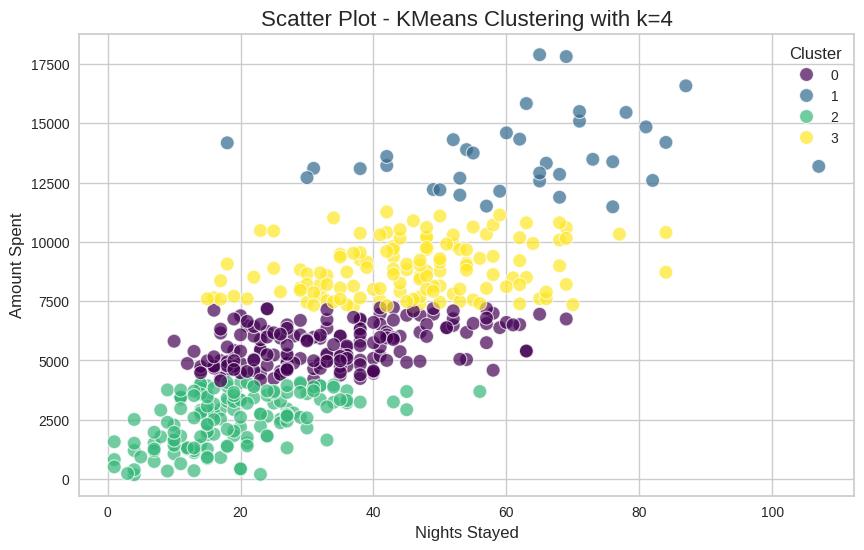

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ scatter phân nhóm
plt.figure(figsize=(10, 6))

# Chọn hai đặc trưng để vẽ biểu đồ 2D (ví dụ: "nights_stayed" và "amount" hoặc bất kỳ cột nào bạn muốn)
sns.scatterplot(data=KM4_clustered, x='nights_stayed', y='amount', hue='Cluster', palette="viridis", s=100, alpha=0.7)

# Thêm tiêu đề và nhãn cho các trục
plt.title('Scatter Plot - KMeans Clustering with k=4', fontsize=16)
plt.xlabel('Nights Stayed', fontsize=12)
plt.ylabel('Amount Spent', fontsize=12)

# Hiển thị biểu đồ
plt.legend(title='Cluster')
plt.show()


**Nhóm 0 (Màu tím):**

Đặc điểm: Khách hàng có số tiền chi tiêu thấp (dưới 5000) và số đêm lưu trú ngắn (dưới 20 đêm).
Nhóm này có thể là nhóm khách bình dân, họ không đặt phòng quá lâu và chi tiêu không nhiều. Đây có thể là nhóm khách lưu trú ngắn hạn hoặc chỉ đặt phòng theo nhu cầu cơ bản.

**Nhóm 1 (Màu xanh lá):**

Đặc điểm: Khách hàng chi tiêu ở mức vừa phải, với số tiền chi tiêu từ 5000 đến 7500 và số đêm lưu trú từ 20 đến 40 đêm.
Nhóm này có thể là nhóm khách thân thiết hoặc khách lưu trú dài hạn. Họ có xu hướng ở lâu hơn và chi tiêu nhiều hơn nhóm trước, nhưng không quá cao.

**Nhóm 2 (Màu xanh dương):**

Đặc điểm: Khách hàng có số tiền chi tiêu rất cao (hơn 10000) nhưng số đêm lưu trú ngắn (dưới 40 đêm).
Nhóm này có thể là khách hàng cao cấp hoặc VIP, họ chi tiêu nhiều nhưng không ở lại lâu. Họ có thể là khách hàng tham gia các sự kiện ngắn hạn hoặc có các yêu cầu dịch vụ cao cấp.

**Nhóm 3 (Màu vàng):**

Đặc điểm: Khách hàng có số tiền chi tiêu cao và số đêm lưu trú dài (từ 40 đêm trở lên, chi tiêu trên 7500).
Nhóm này có thể là nhóm khách hàng VIP hoặc khách thuê dài hạn. Đây là nhóm khách hàng có xu hướng chi tiêu nhiều và ở lâu, có thể là khách hàng thường xuyên hoặc khách thuê cho các dự án dài hạn.

#### **Có bao nhiêu khách hàng có nguy cơ rời bỏ khách sạn?**

In [37]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Merge với rooms_df để lấy room_type
customer_data = bookings_df.merge(rooms_df[["room_id", "room_type"]], on="room_id", how="left")
customer_data['churn']=customer_data['status'].apply(lambda x: 1 if x=='Cancelled' else 0)
customer_data



,booking_id,customer_id,room_id,check_in,check_out,status,created_at,nights_stayed,month,year,room_type,churn
0,1,198,165,2023-12-26,2024-01-02,Cancelled,2023-12-26,7,12,2023,Presidential,1
1,2,466,32,2023-09-02,2023-09-12,Pending,2023-09-02,10,9,2023,Presidential,0
2,3,131,15,2024-06-03,2024-06-07,Pending,2024-06-03,4,6,2024,Executive,0
3,4,138,17,2023-05-26,2023-05-30,Cancelled,2023-05-26,4,5,2023,Executive,1
4,5,50,178,2024-04-19,2024-04-28,Confirmed,2024-04-19,9,4,2024,Presidential,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,219,155,2024-12-15,2024-12-21,Confirmed,2024-12-15,6,12,2024,Suite,0
4996,4997,333,67,2023-04-01,2023-04-15,Cancelled,2023-04-01,14,4,2023,Deluxe,1
4997,4998,330,68,2024-06-29,2024-07-06,Pending,2024-06-29,7,6,2024,Suite,0
4998,4999,109,86,2023-05-22,2023-06-04,Pending,2023-05-22,13,5,2023,Presidential,0


In [38]:
X=customer_data.drop(columns=['churn','check_in','check_out','created_at','month','year'])
y=customer_data['churn']

In [39]:
X

,booking_id,customer_id,room_id,status,nights_stayed,room_type
0,1,198,165,Cancelled,7,Presidential
1,2,466,32,Pending,10,Presidential
2,3,131,15,Pending,4,Executive
3,4,138,17,Cancelled,4,Executive
4,5,50,178,Confirmed,9,Presidential
...,...,...,...,...,...,...
4995,4996,219,155,Confirmed,6,Suite
4996,4997,333,67,Cancelled,14,Deluxe
4997,4998,330,68,Pending,7,Suite
4998,4999,109,86,Pending,13,Presidential


In [40]:
y

,churn
0,1
1,0
2,0
3,1
4,0
...,...
4995,0
4996,1
4997,0
4998,0


In [41]:
X=pd.get_dummies(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [44]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [45]:
# Sử dụng mô hình để dự đoán
predictions = model.predict(X_test)
risky_customers = sum(predictions)

print(f"Số khách hàng có nguy cơ rời bỏ: {risky_customers}")


Số khách hàng có nguy cơ rời bỏ: 352


 #### **Nhóm khách nào sử dụng dịch vụ nhiều nhất?**

In [46]:
# Đọc dữ liệu dịch vụ
service_usage_df = pd.read_csv("service_usage_senior.csv")

# Kiểm tra dữ liệu sau khi đọc
print(service_usage_df.head())



   usage_id  booking_id  service_id  quantity  total_price
0         1        4536           8         5          480
1         2        4689           9         2          212
2         3        4754           8         1           96
3         4        3544           3         3          390
4         5        3790           6         3           81


In [47]:
# Tổng số dịch vụ khách hàng đã sử dụng
service_usage_summary = service_usage_df.groupby("usage_id")["quantity"].sum().reset_index()


service_usage_summary



,usage_id,quantity
0,1,5
1,2,2
2,3,1
3,4,3
4,5,3
...,...,...
6995,6996,5
6996,6997,2
6997,6998,3
6998,6999,5


In [48]:
# Tạo một mô hình K-Means để phân nhóm khách hàng theo số lượng dịch vụ đã sử dụng
kmeans_service = KMeans(n_clusters=5, random_state=42)
service_usage_summary["service_cluster"] = kmeans_service.fit_predict(service_usage_summary[["quantity"]])

# Xem nhóm khách hàng sử dụng dịch vụ nhiều nhất
service_usage_summary_sorted = service_usage_summary.sort_values(by="quantity", ascending=False)
print(service_usage_summary_sorted)


      usage_id  quantity  service_cluster
0            1         5                0
3072      3073         5                0
3077      3078         5                0
3078      3079         5                0
3079      3080         5                0
...        ...       ...              ...
5768      5769         1                1
5767      5768         1                1
5765      5766         1                1
1015      1016         1                1
4096      4097         1                1

[7000 rows x 3 columns]


## **4.Hướng Phát Hiện Bất Thường (Anomaly Detection)**

In [49]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

# Đọc dữ liệu thanh toán
payments_df = pd.read_csv("payments_senior.csv")

# Chọn đặc trưng liên quan đến thanh toán (ví dụ: số tiền thanh toán)
X = payments_df[["amount"]]

# Khởi tạo và huấn luyện Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)  # 2% dữ liệu được coi là bất thường
payments_df["anomaly_score"] = iso_forest.fit_predict(X)

# Lọc ra các giao dịch bất thường
anomalies = payments_df[payments_df["anomaly_score"] == -1]
print(f"Số lượng giao dịch bất thường phát hiện được: {len(anomalies)}")


Số lượng giao dịch bất thường phát hiện được: 58


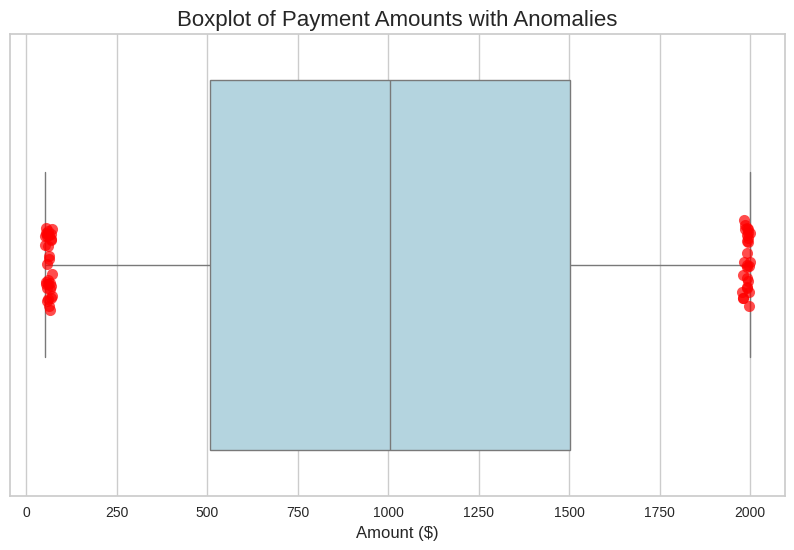

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ boxplot hiển thị các giao dịch bất thường
plt.figure(figsize=(10, 6))
sns.boxplot(x=payments_df["amount"], showfliers=True, color="lightblue")

# Highlight giao dịch bất thường
anomalies = payments_df[payments_df["anomaly_score"] == -1]
sns.stripplot(x=anomalies["amount"], color="red", alpha=0.7, size=8)

plt.title("Boxplot of Payment Amounts with Anomalies", fontsize=16)
plt.xlabel("Amount ($)", fontsize=12)
plt.show()


In [51]:
# Đọc dữ liệu đặt phòng
bookings_df = pd.read_csv("bookings_senior.csv")

# Tính số lần đặt phòng và số lần hủy phòng của mỗi khách hàng
cancelled_bookings = bookings_df[bookings_df["status"] == "Cancelled"].groupby("customer_id")["booking_id"].count().reset_index()
total_bookings = bookings_df.groupby("customer_id")["booking_id"].count().reset_index()

# Merge hai bảng để tính tỷ lệ hủy
cancel_rate_df = total_bookings.merge(cancelled_bookings, on="customer_id", how="left").fillna(0)
cancel_rate_df.rename(columns={"booking_id_x": "total_bookings", "booking_id_y": "cancelled_bookings"}, inplace=True)
cancel_rate_df["cancel_rate"] = cancel_rate_df["cancelled_bookings"] / cancel_rate_df["total_bookings"]

# Sử dụng Isolation Forest để phát hiện khách hàng có tỷ lệ hủy bất thường
iso_forest = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
cancel_rate_df["anomaly_score"] = iso_forest.fit_predict(cancel_rate_df[["cancel_rate"]])

# Lọc ra khách hàng có tỷ lệ hủy bất thường
fraudulent_customers = cancel_rate_df[cancel_rate_df["anomaly_score"] == -1]
print(f"Số lượng khách hàng có tỷ lệ hủy bất thường: {len(fraudulent_customers)}")


Số lượng khách hàng có tỷ lệ hủy bất thường: 10


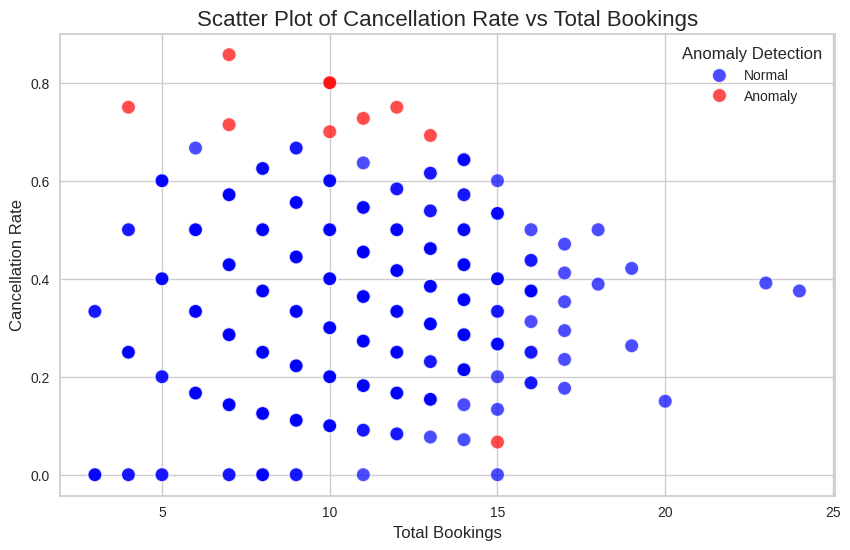

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cancel_rate_df, x="total_bookings", y="cancel_rate", hue="anomaly_score", palette={1: "blue", -1: "red"}, s=100, alpha=0.7)

plt.title("Scatter Plot of Cancellation Rate vs Total Bookings", fontsize=16)
plt.xlabel("Total Bookings", fontsize=12)
plt.ylabel("Cancellation Rate", fontsize=12)
plt.legend(title="Anomaly Detection", labels=["Normal", "Anomaly"])
plt.show()


In [53]:
# Merge dữ liệu đặt phòng và thanh toán để xem khách hàng có thanh toán hay không
customer_fraud_df = bookings_df.merge(payments_df, on="booking_id", how="left")

# Đánh dấu khách hàng có đặt phòng nhưng không thanh toán hoặc hủy phòng liên tục
customer_fraud_df["possible_fraud"] = ((customer_fraud_df["status"] == "Cancelled") & (customer_fraud_df["amount"].isna())).astype(int)

# Tính tổng số lần bị đánh dấu là gian lận của mỗi khách hàng
fraud_counts = customer_fraud_df.groupby("customer_id")["possible_fraud"].sum().reset_index()

# Áp dụng Isolation Forest để phát hiện nhóm khách gian lận
iso_forest = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
fraud_counts["anomaly_score"] = iso_forest.fit_predict(fraud_counts[["possible_fraud"]])

# Lọc ra khách hàng có dấu hiệu gian lận
fraudulent_groups = fraud_counts[fraud_counts["anomaly_score"] == -1]
print(f"Số lượng nhóm khách có dấu hiệu gian lận: {len(fraudulent_groups)}")


Số lượng nhóm khách có dấu hiệu gian lận: 5


<ipython-input-54-f3804e9a99aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_counts.sort_values(by="possible_fraud", ascending=False).head(10), x="customer_id", y="possible_fraud", palette="Reds")


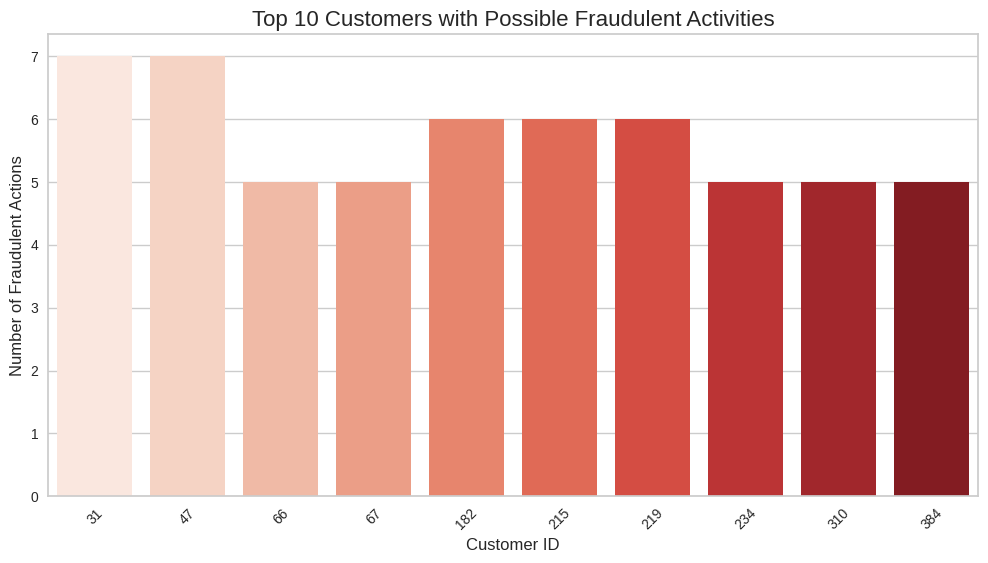

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(data=fraud_counts.sort_values(by="possible_fraud", ascending=False).head(10), x="customer_id", y="possible_fraud", palette="Reds")

plt.title("Top 10 Customers with Possible Fraudulent Activities", fontsize=16)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Number of Fraudulent Actions", fontsize=12)
plt.xticks(rotation=45)
plt.show()
